In [44]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import math

In [45]:
df = pd.read_csv("notas_2014_2017.csv")

Pega todos os dados de todos os alunos que tem mobilidade acadêmica no seu curriculo

In [46]:
alunos_mob = df[df.CODALUNO.isin(df[df["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL"].CODALUNO.unique())]

Pega uma lista com o CODALUNO de todos os alunos que tem mobilidade acadêmica

In [47]:
alunos = alunos_mob[alunos_mob["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL"].CODALUNO.unique()

Cria uma tupla com o codigo do aluno e o primeiro período de sua mobilidade academica, pra cada aluno

In [48]:
alunos_periodo = []
for a in alunos:
    periodo_mob = alunos_mob[(alunos_mob["CODALUNO"] == a) & (alunos_mob["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL")].PERIODO
    alunos_periodo.append((a, periodo_mob.iloc[0]))
print len(alunos_periodo)

518


Cria-se 1 vetor de tuplas, contendo a média das notas de todos os semestres antes e depois do intercambio e o codigo do aluno

In [49]:
notas = []
for l in alunos_periodo:
    aluno = l[0]
    periodo = l[1]
    notas_antes = alunos_mob[(alunos_mob["CODALUNO"] == aluno)&(alunos_mob["PERIODO"] < periodo)].NOTA
    notas_depois = alunos_mob[(alunos_mob["CODALUNO"] == aluno)&(alunos_mob["PERIODO"] > periodo)].NOTA
    notas.append((notas_antes.mean(), aluno, notas_depois.mean()))

Filtra os alunos, pegando somente aqueles que tem alguma nota antes e depois da mobilidade acadêmica

In [50]:
notas_filtradas = []
for l in notas:
    if not (math.isnan(l[0]) or math.isnan(l[2])):
        notas_filtradas.append(l)
print len(notas_filtradas)

231


Cria um dataframe contendo o codigo do aluno, sua média antes do intercâmbio e sua média depois do intercâmbio

In [51]:
n = zip(*notas_filtradas)
notas_df = pd.DataFrame(
            {
                "CODALUNO": n[1],
                "NOTAS_ANTES": n[0],
                "NOTAS_DEPOIS": n[2]}
            )

In [52]:
notas_df.head()

,CODALUNO,NOTAS_ANTES,NOTAS_DEPOIS
0,3542C6DCF5029786A1B6B45FCB91283A,10.000000,10.000
1,3542C6DCF502978691DD5E7C6C5619D6,8.900000,10.000
2,3542C6DCF5029786C13E1261621134ED,0.000000,10.000
3,3542C6DCF5029786139679CEFCF0C92B,9.650000,10.000
4,3542C6DCF5029786891B5354DB9EB2C8,8.185714,9.675


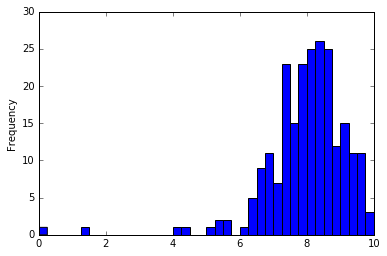

In [53]:
(notas_df.NOTAS_ANTES).plot(kind='hist',bins=40)

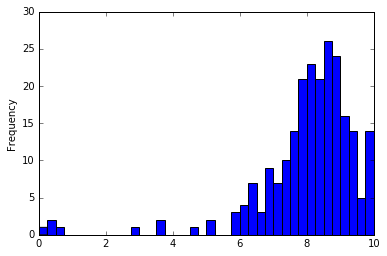

In [54]:
(notas_df.NOTAS_DEPOIS).plot(kind='hist',bins=40)

In [56]:
notas_df.NOTAS_ANTES.describe()

count    231.000000
mean       7.978934
std        1.206619
min        0.000000
25%        7.425625
50%        8.156522
75%        8.700000
max       10.000000
Name: NOTAS_ANTES, dtype: float64

In [55]:
notas_df.NOTAS_DEPOIS.describe()

count    231.000000
mean       8.028725
std        1.541943
min        0.000000
25%        7.581875
50%        8.285714
75%        8.908333
max       10.000000
Name: NOTAS_DEPOIS, dtype: float64

ttest_ind()
We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [57]:
from scipy.stats import ttest_ind
ttest_ind(notas_df['NOTAS_ANTES'], notas_df['NOTAS_DEPOIS'])

Ttest_indResult(statistic=-0.38650988103187039, pvalue=0.69929780770848915)

Logo, conclui-se que não podemos descartar a possibilidade das médias serem iguais.

In [58]:
notas_df[notas_df.NOTAS_ANTES < 7].count()

CODALUNO        35
NOTAS_ANTES     35
NOTAS_DEPOIS    35
dtype: int64

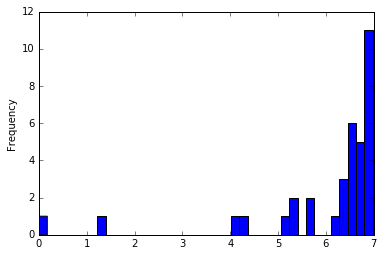

In [59]:
(notas_df[notas_df.NOTAS_ANTES < 7].NOTAS_ANTES).plot(kind='hist',bins=40)

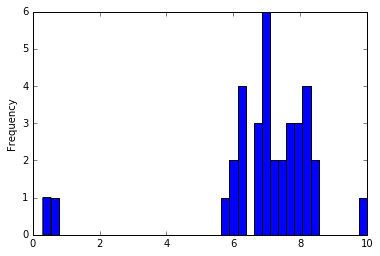

In [60]:
(notas_df[notas_df.NOTAS_ANTES < 7].NOTAS_DEPOIS).plot(kind='hist',bins=40)

In [61]:
notas_df[notas_df.NOTAS_ANTES < 7].NOTAS_ANTES.describe()

count    35.000000
mean      6.027318
std       1.537296
min       0.000000
25%       5.912500
50%       6.594737
75%       6.860000
max       6.976923
Name: NOTAS_ANTES, dtype: float64

In [62]:
notas_df[notas_df.NOTAS_ANTES < 7].NOTAS_DEPOIS.describe()

count    35.000000
mean      6.894663
std       1.825578
min       0.307143
25%       6.468382
50%       7.000000
75%       7.902381
max      10.000000
Name: NOTAS_DEPOIS, dtype: float64

In [63]:
ttest_ind(notas_df[notas_df.NOTAS_ANTES < 7].NOTAS_ANTES, notas_df[notas_df.NOTAS_ANTES < 7].NOTAS_DEPOIS)

Ttest_indResult(statistic=-2.1500092756633395, pvalue=0.035114116939720059)

Logo, conclui-se com 95% de confiança que as médias são significativamente diferentes!

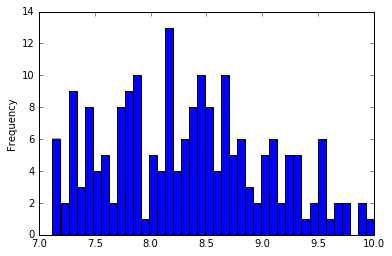

In [64]:
(notas_df[notas_df.NOTAS_ANTES > 7].NOTAS_ANTES).plot(kind='hist',bins=40)

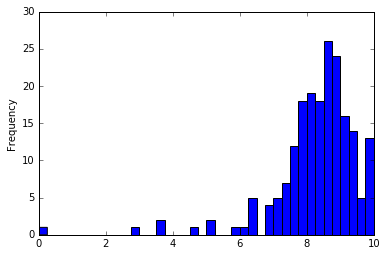

In [65]:
(notas_df[notas_df.NOTAS_ANTES > 7].NOTAS_DEPOIS).plot(kind='hist',bins=40)

In [67]:
notas_df[notas_df.NOTAS_ANTES > 7].NOTAS_ANTES.describe()

count    195.000000
mean       8.334244
std        0.702087
min        7.121739
25%        7.775714
50%        8.314286
75%        8.805556
max       10.000000
Name: NOTAS_ANTES, dtype: float64

In [66]:
notas_df[notas_df.NOTAS_ANTES > 7].NOTAS_DEPOIS.describe()

count    195.000000
mean       8.271525
std        1.281196
min        0.000000
25%        7.889935
50%        8.500000
75%        8.987500
max       10.000000
Name: NOTAS_DEPOIS, dtype: float64

In [68]:
ttest_ind(notas_df[notas_df.NOTAS_ANTES > 7].NOTAS_ANTES, notas_df[notas_df.NOTAS_ANTES > 7].NOTAS_DEPOIS)

Ttest_indResult(statistic=0.59949063374993949, pvalue=0.54919565332611986)

Logo, conclui-se que não pode-se excluir a possibilidade das médias serem iguais. 

PERGUNTA: A participação do aluno em um programa de Mobilidade Acadêmica Internacional afeta a nota do aluno após seu retorno?

LIMITAÇÕES: Para responder esta pergunta, sofremos com a limitação de não possuir as notas anteriores à 2014/1, que foi onde ocorreram a maioria das mobilidades acadêmicas nesta base de dados. Logo, foi necessário filtrar os alunos que possuíam dados de algum semestre antes de iniciar sua mobilidade e dados de algum semestre após o seu retorno. Portanto, os alunos foram filtrados, restando apenas 231 alunos para serem estudadas as notas.

METODOLOGIA: Para avaliar as notas, foram calculadas as médias de cada aluno antes de iniciar seu intercâmbio e as médias após o seu retorno, utilizando a média aritmética simples de todas as cadeiras cursadas. Após, foram realizados os mesmos testes filtrando apenas por alunos que antes de iniciar a mobilidade possuíam média inferior à 7 e depois superior à 7.

RESULTADOS: Considerando todos os alunos, foi analisado que participar de mobilidade acadêmica internacional não afeta a média geral dos alunos. A partir deste resultado, foi criada a hipótese de que isso acontece por para iniciar a mobilidade, é necessário ser considerado aluno de excelência. Portanto, foi considerado que a média não é afetada porque a maioria dos alunos já possuem médias altas e assim não há uma margem alta para melhoria. Para analisar esta hipótese, os alunos foram divididos em alunos com média inferior e superior à 7 antes do início da sua mobilidade. Nos alunos com notas superiores à 7, foi constatado que realmente as médias gerais não são afetadas significativamente pela participação em programas de intercâmbio. Entretanto, na análise dos alunos com média inferior à 7, embora sejam poucos (35 alunos), foi observado que a média aumentou de 6.03 para 6.9. Embora estes valores pareçam próximos, através do teste t de student foi confirmada a diferença significativa entre as médias. Outro ponto que podemos perceber são os quartis 50% e 75% que possuem um aumento mais perceptível.